<a href="https://colab.research.google.com/github/ToltyLep/ToltyLep/blob/main/Exemplo_Estudo_De_Sinal_Em_Grafo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-2-4bacf6bc68ae>:62: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


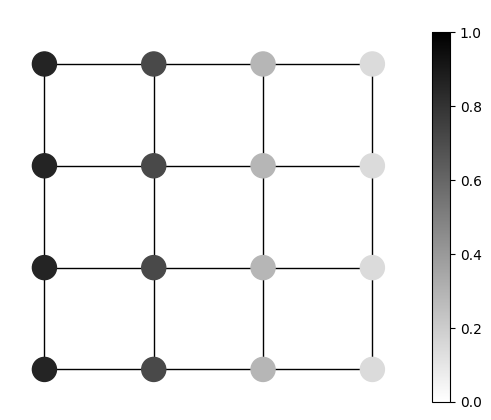

Valor mínimo de f_zero: 0.14285714285714157
Valor máximo de f_zero: 0.857142857142859
forma_quadratica: 0.897959183673475


<ipython-input-2-4bacf6bc68ae>:80: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


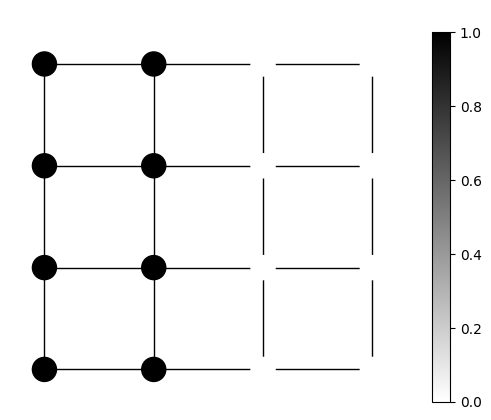

Valor mínimo de f: 0.0
Valor máximo de f: 1.0
forma_quadratica: 4.0


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

G = nx.grid_2d_graph(4,4)

pos = dict()
for i in range(4):
  for j in range(4):
    pos[(i,j)] = (i,j)

#pos = nx.spring_layout(G)

L = nx.laplacian_matrix(G)
L = L.toarray()

Lambda,U = np.linalg.eigh(L)

#print(U)

Ordem = np.argsort(Lambda)

#print(Lambda)
#print()
#print(Ordem)

Lambda = Lambda[Ordem]

U = U[:,Ordem]

#print(Lambda)
#print(U)

f = np.zeros(16,)
for i in range(8):
  f[i] = 1

f_hat = np.zeros(16,)
for l in range(16):
  for i in range(16):
    f_hat[l] += f[i]*U[i,l]

gamma = 1

f_zero = np.zeros(16,)
for i in range(16):
  for l in range(16):
    f_zero[i] += (1/(1+gamma*Lambda[l]))*f_hat[l]*U[i,l]

#print(G.edges(data = True))

cmap = plt.get_cmap('gray_r')

vmin = 0
vmax = 1

plt.figure(dpi=100)
plt.title(' ')
nx.draw(G,pos, node_color = f_zero, cmap = cmap, vmin = vmin, vmax = vmax)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin = vmin, vmax=vmax))
sm._A = []
plt.colorbar(sm)
plt.savefig('grafo_de_grade_com_borda.png')
plt.show()

print('Valor mínimo de f_zero:',np.min(f_zero))
print('Valor máximo de f_zero:',np.max(f_zero))

def forma_quadratica(L,f):
  fq = f.T@L@f
  return(fq)

print('forma_quadratica:',forma_quadratica(L,f_zero))

plt.figure(dpi=100)
plt.title(' ')
nx.draw(G,pos, node_color = f, cmap = cmap, vmin = vmin, vmax = vmax)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin = vmin, vmax=vmax))
sm._A = []
plt.colorbar(sm)
plt.savefig('grafo_de_grade_com_borda.png')
plt.show()

print('Valor mínimo de f:',np.min(f))
print('Valor máximo de f:',np.max(f))

print('forma_quadratica:',forma_quadratica(L,f))

<ipython-input-6-4d81cd5008b7>:65: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


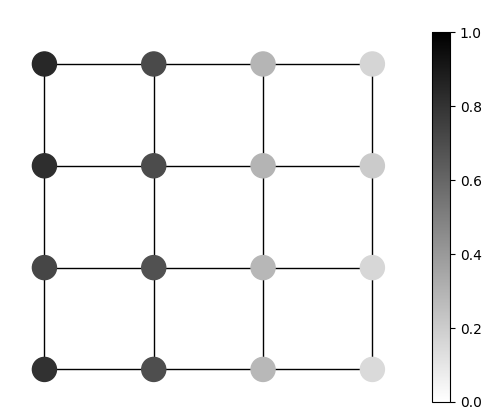

Valor mínimo de f_zero: 0.1462915601023011
Valor máximo de f_zero: 0.8419437340153471
forma_quadratica: 0.7875203378152524


<ipython-input-6-4d81cd5008b7>:83: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


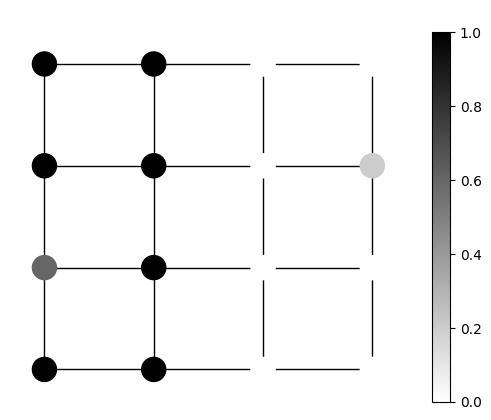

Valor mínimo de f: 0.0
Valor máximo de f: 1.0
forma_quadratica: 4.6


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

G = nx.grid_2d_graph(4,4)

pos = dict()
for i in range(4):
  for j in range(4):
    pos[(i,j)] = (i,j)

#pos = nx.spring_layout(G)

L = nx.laplacian_matrix(G)
L = L.toarray()

Lambda,U = np.linalg.eigh(L)

#print(U)

Ordem = np.argsort(Lambda)

#print(Lambda)
#print()
#print(Ordem)

Lambda = Lambda[Ordem]

U = U[:,Ordem]

#print(Lambda)
#print(U)

f = np.zeros(16,)
for i in range(8):
  f[i] = 1
f[1] = 0.6
f[14] = 0.2


f_hat = np.zeros(16,)
for l in range(16):
  for i in range(16):
    f_hat[l] += f[i]*U[i,l]

gamma = 1

f_zero = np.zeros(16,)
for i in range(16):
  for l in range(16):
    f_zero[i] += (1/(1+gamma*Lambda[l]))*f_hat[l]*U[i,l]

#print(G.edges(data = True))

cmap = plt.get_cmap('gray_r')

vmin = 0
vmax = 1

plt.figure(dpi=100)
plt.title(' ')
nx.draw(G,pos, node_color = f_zero, cmap = cmap, vmin = vmin, vmax = vmax)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin = vmin, vmax=vmax))
sm._A = []
plt.colorbar(sm)
plt.savefig('exemplo2_sinal_f_suavizado.png')
plt.show()

print('Valor mínimo de f_zero:',np.min(f_zero))
print('Valor máximo de f_zero:',np.max(f_zero))

def forma_quadratica(L,f):
  fq = f.T@L@f
  return(fq)

print('forma_quadratica:',forma_quadratica(L,f_zero))

plt.figure(dpi=100)
plt.title(' ')
nx.draw(G,pos, node_color = f, cmap = cmap, vmin = vmin, vmax = vmax)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin = vmin, vmax=vmax))
sm._A = []
plt.colorbar(sm)
plt.savefig('exemplo2_sinal_f.png')
plt.show()

print('Valor mínimo de f:',np.min(f))
print('Valor máximo de f:',np.max(f))

print('forma_quadratica:',forma_quadratica(L,f))

<ipython-input-2-b5f3a194b9ca>:70: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


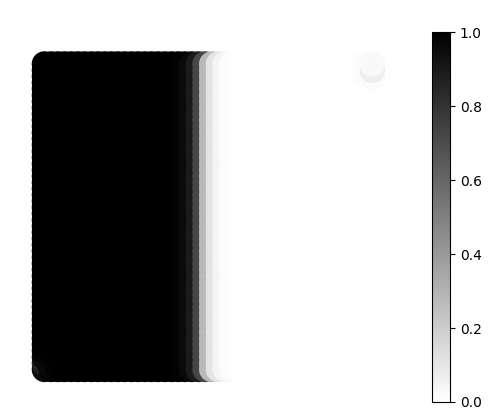

Valor mínimo de f_zero: 3.553153890982291e-11
Valor máximo de f_zero: 0.9999999999644769
forma_quadratica: 13.451357090954426


<ipython-input-2-b5f3a194b9ca>:88: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


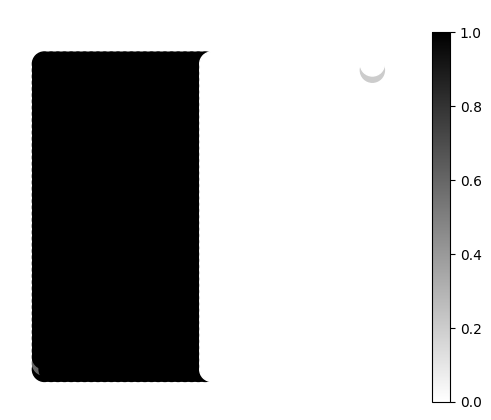

Valor mínimo de f: 0.0
Valor máximo de f: 1.0
forma_quadratica: 50.6
tempo de processamento: 18.14119267463684


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import time

tempo_inicial = time.time()

dm = 50

G = nx.grid_2d_graph(dm,dm)

pos = dict()
for i in range(dm):
  for j in range(dm):
    pos[(i,j)] = (i,j)
g
#pos = nx.spring_layout(G)

L = nx.laplacian_matrix(G)
L = L.toarray()

Lambda,U = np.linalg.eigh(L)

#print(U)

Ordem = np.argsort(Lambda)

#print(Lambda)
#print()
#print(Ordem)

Lambda = Lambda[Ordem]

U = U[:,Ordem]

#print(Lambda)
#print(U)

f = np.zeros(dm*dm,)
for i in range(int(dm*(dm/2))):
  f[i] = 1
f[1] = 0.6
f[dm*dm  - 2] = 0.2


f_hat = np.zeros(dm*dm,)
for l in range(dm*dm):
  for i in range(dm*dm):
    f_hat[l] += f[i]*U[i,l]

gamma = 1

f_zero = np.zeros(dm*dm,)
for i in range(dm*dm):
  for l in range(dm*dm):
    f_zero[i] += (1/(1+gamma*Lambda[l]))*f_hat[l]*U[i,l]

#print(G.edges(data = True))

cmap = plt.get_cmap('gray_r')

vmin = 0
vmax = 1

plt.figure(dpi=100)
plt.title(' ')
nx.draw(G,pos, node_color = f_zero, cmap = cmap, vmin = vmin, vmax = vmax)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin = vmin, vmax=vmax))
sm._A = []
plt.colorbar(sm)
plt.savefig('exemplo2_sinal_f_suavizado.png')
plt.show()

print('Valor mínimo de f_zero:',np.min(f_zero))
print('Valor máximo de f_zero:',np.max(f_zero))

def forma_quadratica(L,f):
  fq = f.T@L@f
  return(fq)

print('forma_quadratica:',forma_quadratica(L,f_zero))

plt.figure(dpi=100)
plt.title(' ')
nx.draw(G,pos, node_color = f, cmap = cmap, vmin = vmin, vmax = vmax)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin = vmin, vmax=vmax))
sm._A = []
plt.colorbar(sm)
plt.savefig('exemplo2_sinal_f.png')
plt.show()

print('Valor mínimo de f:',np.min(f))
print('Valor máximo de f:',np.max(f))

print('forma_quadratica:',forma_quadratica(L,f))

tempo_final = time.time()

print('tempo de processamento:',tempo_final - tempo_inicial)

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import time

tempo_inicial = time.time()

dm = 256

G = nx.grid_2d_graph(dm,dm)

pos = dict()
for i in range(dm):
  for j in range(dm):
    pos[(i,j)] = (i,j)

#pos = nx.spring_layout(G)

L = nx.laplacian_matrix(G)
L = L.toarray()

Lambda,U = np.linalg.eigh(L)

#print(U)

Ordem = np.argsort(Lambda)

#print(Lambda)
#print()
#print(Ordem)

Lambda = Lambda[Ordem]

U = U[:,Ordem]

#print(Lambda)
#print(U)

f = skimage.data.camera()

f_hat = np.zeros(dm*dm,)
for l in range(dm*dm):
  for i in range(dm*dm):
    f_hat[l] += f[i]*U[i,l]

gamma = 1

f_zero = np.zeros(dm*dm,)
for i in range(dm*dm):
  for l in range(dm*dm):
    f_zero[i] += (1/(1+gamma*Lambda[l]))*f_hat[l]*U[i,l]

#print(G.edges(data = True))

cmap = plt.get_cmap('gray_r')

vmin = 0
vmax = 1

plt.figure(dpi=100)
plt.title(' ')
nx.draw(G,pos, node_color = f_zero, cmap = cmap, vmin = vmin, vmax = vmax)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin = vmin, vmax=vmax))
sm._A = []
plt.colorbar(sm)
plt.savefig('exemplo2_sinal_f_suavizado.png')
plt.show()

print('Valor mínimo de f_zero:',np.min(f_zero))
print('Valor máximo de f_zero:',np.max(f_zero))

def forma_quadratica(L,f):
  fq = f.T@L@f
  return(fq)

print('forma_quadratica:',forma_quadratica(L,f_zero))

plt.figure(dpi=100)
plt.title(' ')
nx.draw(G,pos, node_color = f, cmap = cmap, vmin = vmin, vmax = vmax)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin = vmin, vmax=vmax))
sm._A = []
plt.colorbar(sm)
plt.savefig('exemplo2_sinal_f.png')
plt.show()

print('Valor mínimo de f:',np.min(f))
print('Valor máximo de f:',np.max(f))

print('forma_quadratica:',forma_quadratica(L,f))

tempo_final = time.time()

print('tempo de processamento:',tempo_final - tempo_inicial)